In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../../Data/BaseOrdinal.csv')

In [3]:
ordinal = ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal.shape

(2580, 81)

In [5]:
cols = ordinal.columns
cols

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
     

In [6]:
len(cols)

81

In [7]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [8]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [9]:
y

array([126000, 139500, 124900, ..., 145000, 217500, 215000])

In [10]:
X.shape

(2580, 80)

In [11]:
Ridge = Ridge()

In [12]:
Ridge_R2 = []
GBM_R2 = []
GBM_AR2 = []
GBM_MAE = []

for i in range(100):

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    ##Combine X_train and Y_train to create a "Train DataFrame"
    train = pd.DataFrame(np.hstack((X_train, Y_train.reshape(-1,1))),
                         index=X_train[:,0], columns=cols).drop(['Unnamed: 0'], axis=1)
    keep_index = train.index
    
    ##Run Ridge Regression on Training Data (X=X_train, Y=Log10)
    base = pd.read_csv('../../../../Data/BaseData.csv')
    base = base.drop(['PID', 'Unnamed: 0.1'], axis=1)
    
    X_train_ridge = base[base.index.isin(keep_index)].drop(['SalePrice'], axis=1)
    X_test_ridge = base[~base.index.isin(keep_index)].drop(['SalePrice'], axis=1)
    Y_train_ridge = base[base.index.isin(keep_index)].SalePrice.values
    Y_test_ridge = base[~base.index.isin(keep_index)].SalePrice.values
    
    #X_ridge = base.drop(['SalePrice'], axis=1)
    #y_ridge = base.SalePrice.values
    
    #base_drop_outs = base.drop(drop_index, axis=0)
    #X_ridge = base_drop_outs.drop(['Log10'], axis=1)
    #y_ridge = base_drop_outs.Log10.values
    
    scaler_ridge_X = preprocessing.StandardScaler().fit(X_train_ridge)
    scaled_ridge_X_train = scaler_ridge_X.transform(X_train_ridge)
    scaled_ridge_X_test = scaler_ridge_X.transform(X_test_ridge)
    
    #scaler_ridge_Y = preprocessing.StandardScaler().fit(y_ridge.reshape(-1,1))
    #scaled_ridge_Y = scaler_ridge_X.transform(y_ridge)
    
    Ridge.fit(scaled_ridge_X_train, Y_train_ridge)
    Ridge_Score = Ridge.score(scaled_ridge_X_test, Y_test_ridge)
    
    Ridge_Results_Train = Ridge.predict(scaled_ridge_X_train)
    Ridge_Results_Test = Ridge.predict(scaled_ridge_X_test)
    
    Ridge_R2.append(Ridge_Score)
    
    #print(Score)
    #USD = 10**Ridge_Results
    
    #print(USD)
    #print(len(USD))
    
    base_ordinal = pd.read_csv('../../../../Data/BaseOrdinal.csv')
    base_ordinal = base_ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
    #base_ordinal = base_ordinal.assign(Ridge = Ridge_Results)
    
    X_train = base_ordinal[base_ordinal.index.isin(keep_index)].drop(['SalePrice'], axis=1)
    X_test = base_ordinal[~base_ordinal.index.isin(keep_index)].drop(['SalePrice'], axis=1)
    Y_train = base_ordinal[base_ordinal.index.isin(keep_index)].SalePrice.values
    Y_test = base_ordinal[~base_ordinal.index.isin(keep_index)].SalePrice.values
    
    X_train = X_train.assign(Ridge = Ridge_Results_Train)
    X_test = X_test.assign(Ridge = Ridge_Results_Test)
    
    #X_ordinal = base_ordinal.drop(['SalePrice'], axis=1).values
    #Y_ordinal = base_ordinal.SalePrice.values
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    GBM_R2.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
    GBM_AR2.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    GBM_MAE.append(mae)

In [13]:
Results = pd.DataFrame({'Ridge (TT Split) R2': Ridge_R2, 'R(TT)+GBM_R2_NLYS': GBM_R2, 'R(TT)+GBM_AR2_NLYS': GBM_AR2,
                        'R(TT)+GBM MAE NLYS':GBM_MAE})
#Results

In [14]:
Results.describe()

,Ridge (TT Split) R2,R(TT)+GBM_R2_NLYS,R(TT)+GBM_AR2_NLYS,R(TT)+GBM MAE NLYS
count,100.000000,100.000000,100.000000,100.000000
mean,0.897505,0.907111,0.893746,13593.849074
std,0.029448,0.029079,0.033263,534.507168
min,0.788380,0.828711,0.804067,11825.025049
25%,0.872701,0.879483,0.862144,13299.839544
50%,0.908788,0.919964,0.908450,13555.502469
75%,0.918722,0.927079,0.916588,13914.733127
max,0.928597,0.947896,0.940400,14601.693591


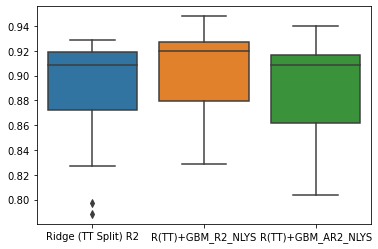

In [15]:
sns.boxplot(data=Results[['Ridge (TT Split) R2','R(TT)+GBM_R2_NLYS', 'R(TT)+GBM_AR2_NLYS']]);

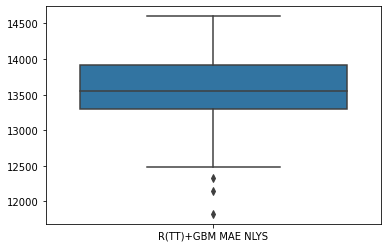

In [16]:
sns.boxplot(data=Results[['R(TT)+GBM MAE NLYS']]);

In [17]:
Results.to_csv('Results8.csv', index=False)

In [18]:
X_train

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,119327.377911
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,130013.352953
4,4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1665,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,210098.164699
6,6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.0,2.0,576.0,0,32,112,0,0,0,0,93474.810547
7,7,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,1.0,2.0,4.0,2.0,2.0,5.0,1.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,2.0,6.0,5.0,1246,53.000000,3710,7,5,2007,2008,20.0,0.0,0.0,1146.0,1146.0,1246,0,0,0.0,0.0,2,0,2,1,5,1,2007.0,2.0,428.0,100,24,0,0,0,0,0,206595.258611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,2574,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,5.0,3.0,0.0,6.0,12.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1724,62.000000,7162,7,5,2003,2004,190.0,0.0,0.0,796.0,796.0,806,918,0,0.0,0.0,2,1,3,1,8,1,2003.0,2.0,616.0,168,57,0,0,0,0,0,196459.201580
2575,2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,952,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,112825.288524
2577,2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,2002,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,160232.738857
2578,2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.

In [19]:
X_test

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,120346.944562
3,3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1039,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,107907.237610
5,5,14.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,4.0,2.0,6.0,0.0,3.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,3.0,4.0,1922,64.000000,7301,7,5,2003,2003,500.0,0.0,0.0,0.0,0.0,495,1427,0,0.0,0.0,3,0,4,1,7,1,2003.0,2.0,672.0,0,0,177,0,0,0,0,222226.804622
10,10,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,4.0,2.0,3.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,2.0,9.0,4.0,1342,48.000000,6240,8,5,2006,2007,196.0,24.0,0.0,1318.0,1342.0,1342,0,0,0.0,0.0,2,0,2,1,6,1,2007.0,2.0,550.0,0,35,0,0,0,0,0,196747.418979
13,13,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,2.0,5.0,3.0,1.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,1394,68.516053,9500,6,5,1963,1963,247.0,609.0,0.0,785.0,1394.0,1394,0,0,1.0,0.0,1,1,3,1,6,2,1963.0,2.0,514.0,0,76,0,0,185,0,0,174185.738190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,2559,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,3.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,8.0,4.0,9.0,4.0,1580,80.000000,10032,6,5,1959,1959,432.0,734.0,0.0,510.0,1244.0,1580,0,0,1.0,0.0,1,1,3,1,6,2,1956.0,2.0,440.0,0,28,0,0,160,0,0,197406.820989
2564,2564,9.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,0.0,1.0,8.0,0.0,9.0,4.0,1734,77.000000,9786,6,7,1962,1981,0.0,600.0,0.0,312.0,912.0,1085,649,0,0.0,0.0,1,1,3,1,7,1,1962.0,2.0,440.0,0,0,0,0,128,0,0,181827.580566
2566,2566,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,1.0,26.0,2.0,2.0,0.0,5.0,3.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,0.0,9.0,4.0,2519,42.000000,26178,7,5,1989,1990,293.0,965.0,0.0,245.0,1210.0,1238,1281,0,1.0,0.0,2,1,4,1,9,2,1989.0,2.0,628.0,320,27,0,0,0,0,0,294970.290627
2568,2568,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,0.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,3.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0

In [20]:
X_train_ridge

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConL

In [21]:
X_test_ridge

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConL

In [22]:
Ridge_Results_Train

array([119327.37791128, 130013.35295292, 210098.16469927, ...,
       160232.73885716, 223653.09206222, 207455.06166396])

In [23]:
Ridge_Results_Test

array([120346.94456198, 107907.23761046, 222226.8046219 , 196747.41897871,
       174185.73819005, 102947.59860731, 119523.29715732, 220118.03753991,
        96045.45901468, 212321.83982566, 431763.06389285,  88691.19852722,
       154099.94443543, 198636.94849291, 177709.87365984,  96216.06622422,
       162321.97735688, 154322.19433887, 322913.85945228, 388030.14487061,
       136215.35900063, 173111.51986543,  95219.30120764, 161521.66931343,
        91184.45507815, 235171.20048088, 147440.95461357, 138275.16229442,
       115735.12268766, 258158.28914864, 275587.83720756, 170236.6559645 ,
       179617.21225857,  56510.34618639, 204551.92130816, 141455.64120769,
       221849.76611154, 130421.588074  , 120937.5270896 , 269187.8749337 ,
       149860.49078111,  90827.62065585, 274843.57409172, 232815.23123797,
       246416.36409341, 291650.45407752, 142100.94624835, 280449.49094207,
       104952.21106515, 129564.09821737, 177913.47849315, 231710.91554029,
       103230.06618188, 3

In [24]:
#X_train.shape[1]

In [25]:
#train

In [27]:
len(Ridge_Results_Train)

1935

In [28]:
len(Ridge_Results_Test)

645